In [1]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.1 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import antigranular as ag
session = ag.login("tM3bEZVPTilWwiqTJFkvtNmA4cqFUOBb", "19d4LdAnAZx9uAmceTX2AUOwVdFxkrG/zRWiKGtsPfd8DEWAI7VGGw4gQsFY96Lh", dataset = "Car Evaluation")

Loading dataset "Car Evaluation" to the kernel...
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Connected to Antigranular server session id: 2229c95b-abfe-469d-9ce4-995faf88f8e7, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [5]:
%%ag
import pandas as pd

In [6]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Index(['class'], dtype='object')



In [7]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Data Preprocessing

In [8]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



In [9]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In [10]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


In [11]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



Apply Encoding for train_x

In [12]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

In [13]:
%%ag
ag_print(train_x.describe(eps=.1))

            buying        maint        doors      persons     lug_boot  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      2.110648     1.966146     3.543543     3.979962     0.000000   
std       1.793121     0.704135     1.232611     0.378116     1.517178   
min       1.744964     0.205741     2.772842     0.167633     0.104963   
25%       1.482522     0.595089     1.733848     1.100629     2.708758   
50%       2.084970     2.776177     1.003980     1.887595     1.049486   
75%       1.072496     3.179911     3.773045     3.932019     2.596701   
max       3.150511     3.085992     2.394541     1.219287     1.013179   

            safety  
count  1382.000000  
mean      2.583196  
std       1.748432  
min       0.232503  
25%       1.508403  
50%       3.078075  
75%       3.470725  
max       3.975803  



Apply encoding train_y

In [14]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

In [15]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1372.000000
mean      0.361887
std       0.993460
min       0.441501
25%       0.665075
50%       3.757993
75%       3.923892
max       2.262018



## Data Visualization

Join two dataset train_x and train_y

In [16]:
%%ag
train_data = train_x.join(train_y, how="inner")

In [17]:
%%ag
ag_print(train_x.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')



In [18]:
%%ag
mean_class_0 = train_data.where(train_data['class'] == 0).mean(eps=1)
ag_print(mean_class_0)
export(mean_class_0, 'mean_class_0')

Setting up exported variable in local environment: mean_class_0
buying      1.622835
maint       1.643755
doors       1.202769
persons     0.807942
lug_boot    0.928767
safety      0.741729
class       0.000462
dtype: float64



In [19]:
%%ag
mean_class_1 = train_data.where(train_data['class'] == 1).mean(eps=1)
mean_class_2 = train_data.where(train_data['class'] == 2).mean(eps=1)
mean_class_3 = train_data.where(train_data['class'] == 3).mean(eps=1)
export(mean_class_1, 'mean_class_1')
export(mean_class_2, 'mean_class_2')
export(mean_class_3, 'mean_class_3')


Setting up exported variable in local environment: mean_class_1
Setting up exported variable in local environment: mean_class_2
Setting up exported variable in local environment: mean_class_3


In [20]:
# to pandas dataframe
df = pd.DataFrame([mean_class_0, mean_class_1, mean_class_2, mean_class_3])

In [21]:
df.drop(columns=['class'], inplace=True)

<Axes: >

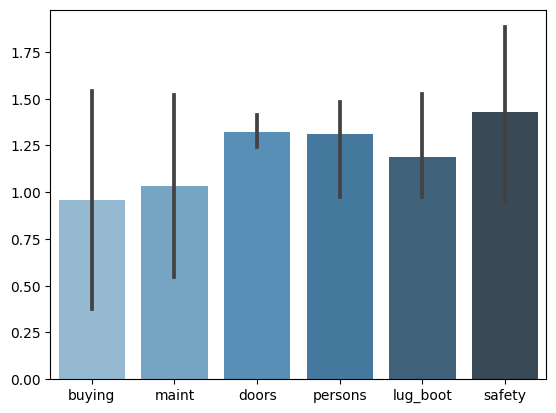

In [22]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like most important.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

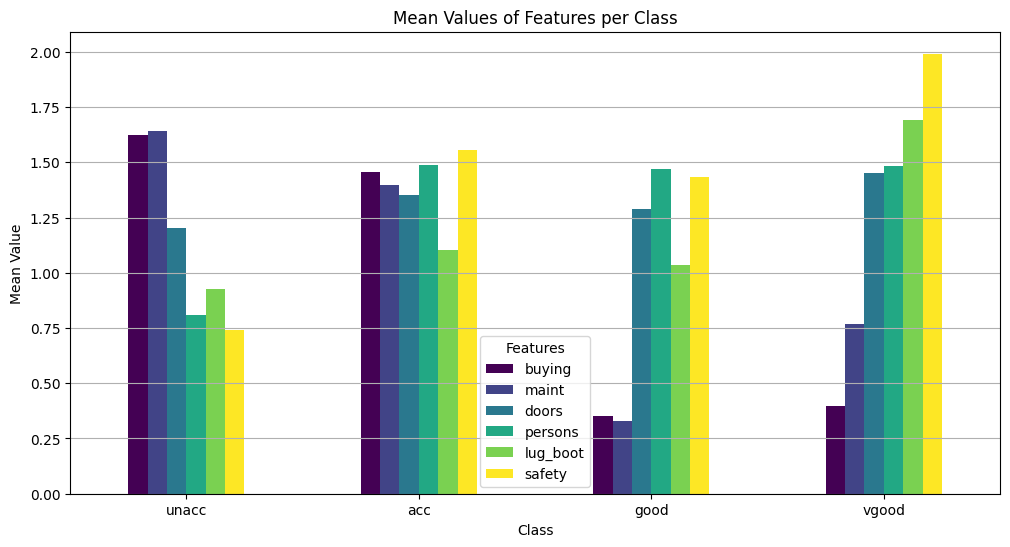

In [23]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

## Observations:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorized as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [24]:
session.privacy_odometer()

{'total_epsilon_used': 11.2,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Rule based Model

In [25]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions


In [26]:
%%ag
predictions = rule_based_model(test_x)

In [27]:
%%ag
submit_predictions(pd.DataFrame(predictions))

score: {'leaderboard': 0.7165329151801372, 'logs': {'BIN_ACC': 0.7165329151801372}}



In [28]:
session.terminate_session()

{'status': 'ok'}